# Exploratory data analysis in Python

### About Exploratory Data Analysis

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations. EDA is an approach/philosophy for data analysis that employs a variety of techniques (mostly graphical) to
* maximize insight into a data set
* uncover underlying structure
* extract important variables
* detect outliers and anomalies
* test underlying assumptions
* develop parsimonious models and
* determine optimal factor settings.


## 1.Importing the Required Libraries and dataset

In [2]:
# including necessary modules such as pandas, matplotlib, seaborn and numpy
import pandas as pd
import numpy as np
# for visualisation
import seaborn as sns                       
import matplotlib.pyplot as plt     

In [3]:
pwd # getting current path of directory

u'C:\\Users\\User-Pc\\Desktop\\ML'

### 1.1 Loading the data into the data frame.

In [4]:
#reading csv file
car_data=pd.read_csv("C:\\Users\\User-Pc\\Desktop\\ML\data.csv")

In [5]:
# printing first five enteries
car_data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


### 1.2 Checking the types of data and basic summary stats
It is very important to check whether the data with which we are dealing either has null values or not whether the data is categorical or whether checking duplicacy of data. Moreover, we also need to check whether the target variable MSRP or Price is stored as a string or not. If stored as a string then we need convert that string to the integer data only then we can plot the data via a graph. 

In [9]:
c_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
Make                11914 non-null object
Model               11914 non-null object
Year                11914 non-null int64
Engine Fuel Type    11911 non-null object
HP                  11845 non-null float64
Cylinders           11884 non-null float64
Transmission        11914 non-null object
Drive Mode          11914 non-null object
Number of Doors     11908 non-null float64
Market Category     8172 non-null object
Vehicle Size        11914 non-null object
Vehicle Style       11914 non-null object
MPG-H               11914 non-null int64
MPG-C               11914 non-null int64
Popularity          11914 non-null int64
Price               11914 non-null int64
dtypes: float64(3), int64(5), object(8)
memory usage: 1.5+ MB


In [ ]:
# getting statistics related to car_data
c_data.describe()


## 2. Dropping irrelevant columns
This is a very important step since  there would be columns that we never use and in such cases dropping is useful. Now dropping Market Category is useful since it has more than 40% data missing and dropping no. of doors as well since it is less relevant

In [ ]:
# dropping Market Category since it has more than 40% data missing and dropping no. of doors as well since it is less relevant
c_data=c_data.drop(['Market Category', 'Number of Doors'],axis=1)
c_data.head()

In [ ]:
# finding out not null values in column Cylinders
c_data.Cylinders.notnull()

In [ ]:
c_data["Drive Mode"].notnull()

In [ ]:
# Finding out duplicate values
c_data.duplicated()

## 3. Renaming the columns

In [7]:
# Renaming the columns and storing the data in c_data
c_data=car_data.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode", "highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price"})

In [8]:
c_data.head(3)

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Market Category,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350


In [13]:
## Showing duplicate data
c_data[c_data.duplicated()]

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
14,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,19,3916,31500
18,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,Midsize,Sedan,24,17,3105,2000
20,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,Midsize,Sedan,24,17,3105,2000
24,Audi,100,1993,regular unleaded,172.0,6.0,MANUAL,front wheel drive,Midsize,Sedan,24,17,3105,2000
25,Audi,100,1993,regular unleaded,172.0,6.0,MANUAL,front wheel drive,Midsize,Sedan,24,17,3105,2000
88,Nissan,200SX,1996,regular unleaded,115.0,4.0,MANUAL,front wheel drive,Compact,Coupe,36,26,2009,2000
92,Nissan,200SX,1997,regular unleaded,115.0,4.0,MANUAL,front wheel drive,Compact,Coupe,35,25,2009,2000
94,Nissan,200SX,1998,regular unleaded,115.0,4.0,MANUAL,front wheel drive,Compact,Coupe,35,25,2009,2000
109,Volvo,240,1992,regular unleaded,114.0,4.0,MANUAL,rear wheel drive,Midsize,Sedan,26,19,870,2000
126,BMW,3 Series Gran Turismo,2015,premium unleaded (required),240.0,4.0,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,33,22,3916,41850


In [14]:
mc_data=c_data

In [15]:
mc_data.head(2)

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650


## 4. Dropping the duplicate rows
It is very important to remove duplicate values from data set.

In [16]:
# removing duplicate values
mc_data.drop_duplicates(keep="first", inplace=True)

In [17]:
mc_data.head(22)

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,27,18,3916,37200


### 4.1 Dropping the missing or null values.
Now in this step all the missing values are detected and are dropped later. 

In [18]:
# printing the no. of null values for each column
print(mc_data.isnull().sum())

Make                 0
Model                0
Year                 0
Engine Fuel Type     3
HP                  69
Cylinders           30
Transmission         0
Drive Mode           0
Vehicle Size         0
Vehicle Style        0
MPG-H                0
MPG-C                0
Popularity           0
Price                0
dtype: int64


In [19]:
# drop all rows with null or missing values
mc_data=mc_data.dropna()

In [20]:
print(mc_data.isnull().sum())

Make                0
Model               0
Year                0
Engine Fuel Type    0
HP                  0
Cylinders           0
Transmission        0
Drive Mode          0
Vehicle Size        0
Vehicle Style       0
MPG-H               0
MPG-C               0
Popularity          0
Price               0
dtype: int64


In [21]:
sns.boxplot?

Signature: sns.boxplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, notch=False, ax=None, **kwargs)
Docstring:
Draw a box plot to show distributions with respect to categories.

A box plot (or box-and-whisker plot) shows the distribution of quantitative
data in a way that facilitates comparisons between variables or across
levels of a categorical variable. The box shows the quartiles of the
dataset while the whiskers extend to show the rest of the distribution,
except for points that are determined to be "outliers" using a method
that is a function of the inter-quartile range.


Input data can be passed in a variety of formats, including:

- Vectors of data represented as lists, numpy arrays, or pandas Series
  objects passed directly to the ``x``, ``y``, and/or ``hue`` parameters.
- A "long-form" DataFrame, in which case the ``x``, ``y``, and ``hue`

## 5. Detecting Outliers
An outlier is an observation that lies an abnormal distance from other values in a random sample from a population. In a sense, this definition leaves it up to the analyst (or a consensus process) to decide what will be considered abnormal. Before abnormal observations can be singled out, it is necessary to characterize normal observations.


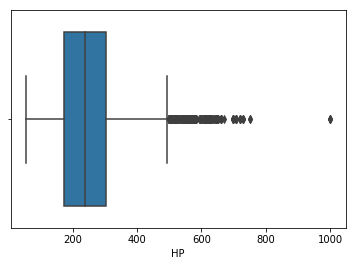

In [22]:
# Detecting outliers in column HP using box-plot
sns.boxplot(x="HP", data=mc_data)

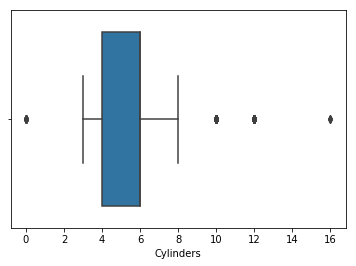

In [23]:
# Detecting outliers in column Cylinders using box-plot
sns.boxplot(x="Cylinders", data=mc_data)

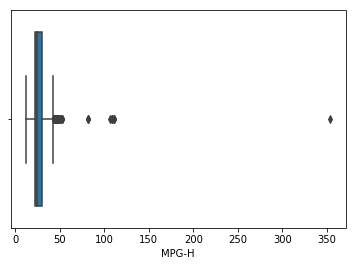

In [24]:
# Detecting outliers in column MPG-H using box-plot
sns.boxplot(x="MPG-H", data=mc_data)

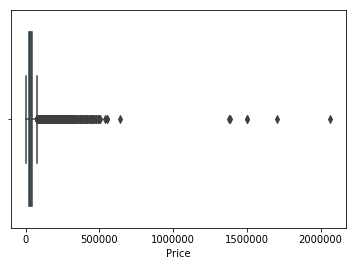

In [25]:
# Detecting outliers in column Price using box-plot
sns.boxplot(x="Price", data=mc_data)

In [26]:
q1 = mc_data.quantile(0.25)
q3 = mc_data.quantile(0.75)
iqr = q3 - q1
iqr

Year              9.00
HP              131.00
Cylinders         2.00
MPG-H             8.00
MPG-C             6.00
Popularity     1460.00
Price         21491.25
dtype: float64

In [27]:
mc_data = mc_data[~((mc_data < (q1 - 1.5*iqr)) | (mc_data > (q3 + 1.5*iqr))) .any(axis=1)]
mc_data.shape

(8608, 14)

## 6. Top Car brands 

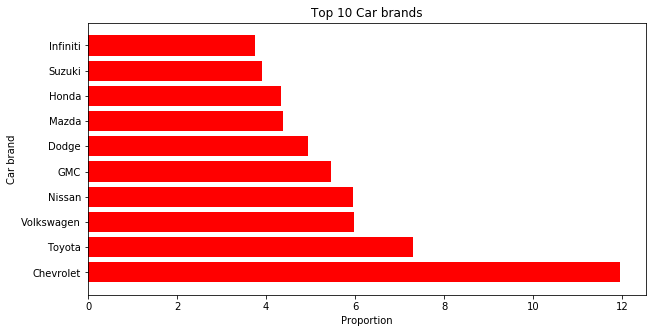

In [39]:
# Percentage of car per brand
count_car = mc_data["Make"].value_counts()*100/sum(mc_data["Make"].value_counts())

# Top 10 car brands
popular_labels = count_car.index[:10]
    
# Plot
plt.figure(figsize=(10,5))
plt.barh(popular_labels, width=count_car[:10], color="red")
plt.xlabel("Proportion")
plt.ylabel("Car brand")
plt.title('Top 10 Car brands')
plt.show()


In [40]:
prices = mc_data[['Make','Price']].loc[(mc_data['Make'] == 'Chevrolet')|
               (mc_data['Make'] == 'Ford')|
               (mc_data['Make'] == 'Volkswagen')|
               (mc_data['Make'] == 'Toyota')|
               (mc_data['Make'] == 'Dodge')|
               (mc_data['Make'] == 'Nissan')|
               (mc_data['Make'] == 'GMC')|
               (mc_data['Make'] == 'Honda')|
               (mc_data['Make'] == 'Mazda')].groupby('Make').mean()
print(prices)


                   Price
Make                    
Chevrolet   28188.626459
Dodge       26076.722353
GMC         33261.400853
Honda       27381.364611
Mazda       20495.820106
Nissan      28352.543860
Toyota      29011.750397
Volkswagen  29032.817476


## 7.Correlation Matrix

In [41]:
mc_data.corr()


,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.330540,-0.094397,0.359829,0.323613,0.204453,0.591644
HP,0.330540,1.000000,0.741031,-0.465311,-0.563362,0.105691,0.743497
Cylinders,-0.094397,0.741031,1.000000,-0.697884,-0.750850,0.025803,0.392174
MPG-H,0.359829,-0.465311,-0.697884,1.000000,0.937936,0.080857,-0.127772
MPG-C,0.323613,-0.563362,-0.750850,0.937936,1.000000,0.070320,-0.202410
Popularity,0.204453,0.105691,0.025803,0.080857,0.070320,1.000000,0.116684
Price,0.591644,0.743497,0.392174,-0.127772,-0.202410,0.116684,1.000000


### Finding out High correlation
* Between HP and Cylinders
* Between HP and Price
* Between MPG-H and MPG-C

So from above, we can conclude that higher is HP more cylinders will be there in car due to positive correlation.
Same applies to HP and Price, MPG-H and MPG-C as well

## Finding out AntiCorrelation
* Between Cylinders and MPG-H
* Between Cylinders and MPG-C

So from above, we can conclude that higher is MPG-H less cylinders will be there in car due to negative correlation. Same applies to MPG-C and cylinders as well

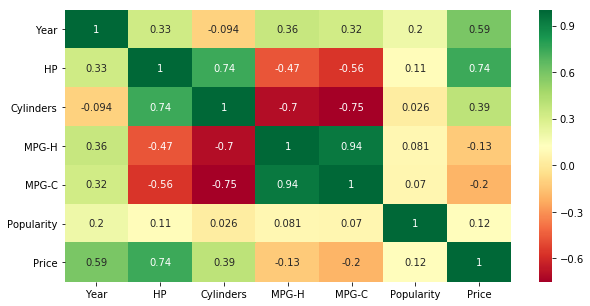

In [51]:
plt.figure(figsize=(10,5))
c= mc_data.corr()
sns.heatmap(c,cmap="RdYlGn",annot=True)


## 8.Scatter Plot
We generally use scatter plots to find the correlation between two variables. Here the scatter plots are plotted between Horsepower and Price and we can see the plot below. With the plot given below, we can easily draw a trend line.

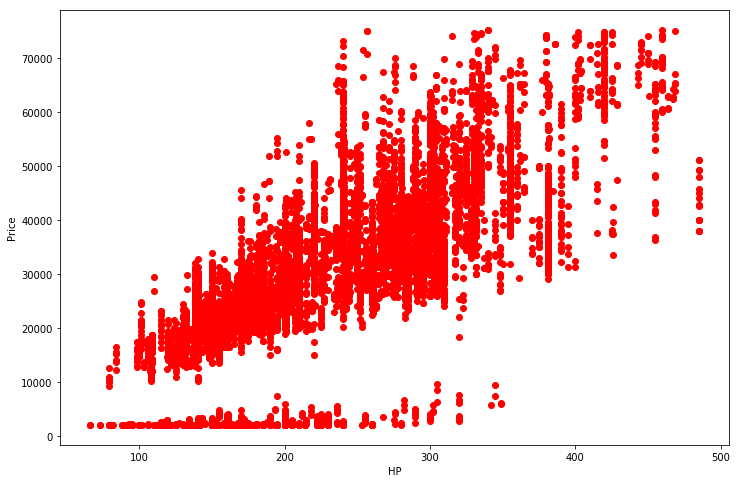

In [53]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(mc_data['HP'], mc_data['Price'],color="Red")
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()